In [1]:
# Задача: требуется построить модель, которая по датасету с данными о первых 5 минутах матча в Dota 2 
# будет определять команду-победителя. Решим задачу с помощью градиентного бустинга.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dota.csv', index_col='match_id')
df.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 82331
Columns: 108 entries, start_time to barracks_status_dire
dtypes: float64(12), int64(96)
memory usage: 58.2 MB


In [4]:
df.describe()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,68439.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1.442220e+09,2.967942,51.366820,3.424149,1225.081573,1134.383591,11.127688,0.344891,0.353905,8.147574,...,3.281118,2.430149,0.671424,-6.699528,2384.730925,0.510022,1246.813683,1240.582294,39.248746,40.639566
std,5.266219e+06,3.010681,32.553277,1.127802,572.946579,461.279848,9.083273,0.654681,0.621478,2.523717,...,1.162134,0.820919,0.711354,42.065209,716.378061,0.499903,877.670293,871.389454,28.299220,27.389171
min,1.430199e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-84.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.438062e+09,1.000000,22.000000,3.000000,754.000000,735.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,2.000000,0.000000,-32.000000,1879.000000,0.000000,4.000000,6.000000,3.000000,3.000000
50%,1.443599e+09,1.000000,50.000000,3.000000,1157.000000,1093.000000,10.000000,0.000000,0.000000,8.000000,...,3.000000,2.000000,1.000000,-16.000000,2324.000000,1.000000,1796.000000,1796.000000,60.000000,59.000000
75%,1.446913e+09,7.000000,75.000000,4.000000,1703.000000,1468.000000,19.000000,1.000000,1.000000,10.000000,...,4.000000,3.000000,1.000000,8.000000,2826.000000,1.000000,1974.000000,1974.000000,63.000000,63.000000
max,1.448665e+09,7.000000,112.000000,6.000000,3240.000000,3881.000000,47.000000,8.000000,5.000000,34.000000,...,9.000000,9.000000,10.000000,300.000000,8452.000000,1.000000,2047.000000,2047.000000,63.000000,63.000000


In [5]:
# Описание смысла столбцов:

# match_id: идентификатор матча в наборе данных
# start_time: время начала матча (unixtime)
# lobby_type: тип комнаты, в которой собираются игроки

# Наборы признаков для каждого игрока (игроки команды Radiant — префикс rN, Dire — dN):
# r1_hero: герой игрока
# r1_level: максимальный достигнутый уровень героя (за первые 5 игровых минут)
# r1_xp: максимальный полученный опыт
# r1_gold: достигнутая ценность героя
# r1_lh: число убитых юнитов
# r1_kills: число убитых игроков
# r1_deaths: число смертей героя
# r1_items: число купленных предметов

# Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, 
    # то признаки принимают пропущенное значение:
# first_blood_time: игровое время первой крови
# first_blood_team: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
# first_blood_player1: игрок, причастный к событию
# first_blood_player2: второй игрок, причастный к событию

# Признаки для каждой команды (префиксы radiant_ и dire_):
# radiant_bottle_time: время первого приобретения командой предмета "bottle"
# radiant_courier_time: время приобретения предмета "courier" 
# radiant_flying_courier_time: время приобретения предмета "flying_courier" 
# radiant_tpscroll_count: число предметов "tpscroll" за первые 5 минут
# radiant_boots_count: число предметов "boots"
# radiant_ward_observer_count: число предметов "ward_observer"
# radiant_ward_sentry_count: число предметов "ward_sentry"
# radiant_first_ward_time: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть 
    # часть игрового поля

# Итог матча:
# duration: длительность
# radiant_win: 1, если победила команда Radiant, 0 — иначе

# Состояние башен и барраков к концу матча
# tower_status_radiant
# tower_status_dire
# barracks_status_radiant
# barracks_status_dire

In [6]:
# Удаляем признаки, связанные с итогами матча:
X = df.drop(['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', \
                         'barracks_status_radiant', 'barracks_status_dire'], axis=1)
# Целевую переменную содержит столбец radiant_win
y = df.radiant_win

In [7]:
# Проверяем выборку на наличие пропущенных значений:
print(X.isna().query('first_blood_time == True')[['first_blood_time']].count())
print(X.isna().query('first_blood_team == True')[['first_blood_team']].count())
print(X.isna().query('first_blood_player1 == True')[['first_blood_player1']].count())
print(X.isna().query('first_blood_player2 == True')[['first_blood_player2']].count())
print(X.isna().query('radiant_bottle_time == True')[['radiant_bottle_time']].count())
print(X.isna().query('radiant_courier_time == True')[['radiant_courier_time']].count())
print(X.isna().query('radiant_flying_courier_time == True')[['radiant_flying_courier_time']].count())
print(X.isna().query('radiant_first_ward_time == True')[['radiant_first_ward_time']].count())
print(X.isna().query('dire_bottle_time == True')[['dire_bottle_time']].count())
print(X.isna().query('dire_courier_time == True')[['dire_courier_time']].count())
print(X.isna().query('dire_flying_courier_time == True')[['dire_flying_courier_time']].count())
print(X.isna().query('dire_first_ward_time == True')[['dire_first_ward_time']].count())

# Обоснование пропусков:
# first_blood_time: игровое время первой крови - за первые 5 минут это событие наступило не во всех матчах

# radiant_bottle_time: время первого приобретения командой предмета "bottle" - не все команды могли совершить 
# это приобретение в течение первых 5 минут матча

first_blood_time    17654
dtype: int64
first_blood_team    17654
dtype: int64
first_blood_player1    17654
dtype: int64
first_blood_player2    42088
dtype: int64
radiant_bottle_time    11534
dtype: int64
radiant_courier_time    528
dtype: int64
radiant_flying_courier_time    18893
dtype: int64
radiant_first_ward_time    1544
dtype: int64
dire_bottle_time    11549
dtype: int64
dire_courier_time    503
dtype: int64
dire_flying_courier_time    17526
dtype: int64
dire_first_ward_time    1560
dtype: int64


In [8]:
# Заменяем пропущенные значения в данных на нули
X = X.fillna(value=0)

In [9]:
# Реализуем градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [10]:
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Тестовое множество составит 33%, оставшиеся 67% - тренировочное множество

In [11]:
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
parameters = {'n_estimators': [1, 5, 10, 20, 30, 40, 50]
             }

In [13]:
# n_jobs=-1 - используем все процессоры для ускорения быстродействия
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)

In [14]:
# Измерение времени работы кода при обучении классификатора
import time
import datetime
start_time = datetime.datetime.now()

grid_search_cv_clf.fit(X_train, y_train)

print('Затраченное время:', datetime.datetime.now() - start_time)

Затраченное время: 0:01:26.177890


In [15]:
grid_search_cv_clf.best_params_

{'n_estimators': 50}

In [16]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
best_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
print(best_clf.score(X_train, y_train))    # Точность на тренировочных данных
print(best_clf.score(X_test, y_test))    # Точность на тестовых данных

y_pred = best_clf.predict(X_test)

y_predicted_prob = best_clf.predict_proba(X_test)    # Вероятности отнесения к одному из двух классов

0.6561760378686112
0.6402597402597403


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.6396127470754337
0.6735196669781667
0.6396109236117773


In [20]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[6862, 4467],
       [3843, 7928]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

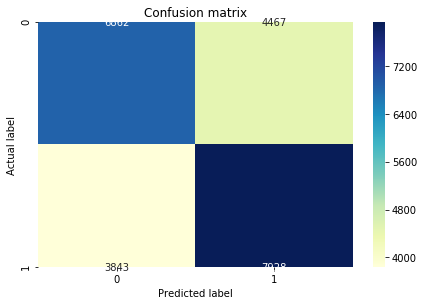

In [21]:
# Отобразим Confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
ax.yaxis.set_label_position("left")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')